In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection
from tensorflow.examples.tutorials.mnist import input_data
# from tensorflow.keras.backend import one_hot #session run이 필요하다. 
from tensorflow.keras.utils import to_categorical #session이 필요 없기 때문에 이걸 쓰면 된다. 굳이 one-hot으로 변경 안해도 된다.
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)  # 0~9 있으니까 one-hot 인코팅으로 하면 =10이다. 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

In [5]:
x_train.shape #28*28 픽셀 이미지인데, 이걸 1차원 행으로 reshape 한 것이다. 

(55000, 784)

In [6]:
y_train.shape

(55000, 10)

In [7]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.constant(y_train, tf.float32)

In [8]:
w1 = tf.get_variable('w1',[784,100], initializer=tf.contrib.layers.xavier_initializer()) #deep-learning #xavier 초기화 해줌
b1 = tf.get_variable('b1',[100], initializer=tf.contrib.layers.xavier_initializer())
z1 = tf.matmul(x,w1) + b1 #(784,100)
lay1 = tf.nn.relu(z1)  #학습이 안되면 중간중간 RELu를 넣어주어야 한다. 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [9]:
w2 = tf.get_variable('w2',[100,10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable('b2',[10], initializer=tf.contrib.layers.xavier_initializer())
z2 = tf.matmul(lay1,w2) + b2 
hx = tf.nn.softmax(z2) #맨 마지막에는 무조건 softmax가 와야한다. 

In [10]:
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=z2, labels=y)  #소프트맥스와 크로스앤트로피가 결합되어있는 것이다. 

cost = tf.reduce_mean(cost_i)

In [11]:
optimizer = tf.train.GradientDescentOptimizer(0.1) #Learning rate
train = optimizer.minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
for i in range( 300):  #최대한 돌려주고 earlystopping 돌리면 된다. 
    sess.run( train, {x:x_train})
    print( i, sess.run(cost, {x:x_train}))

0 2.2887235
1 2.1669064
2 2.067996
3 1.9818478
4 1.9037384
5 1.831106
6 1.7625241
7 1.6971983
8 1.6348389
9 1.575299
10 1.5185043
11 1.464388
12 1.4129505
13 1.3642235
14 1.318163
15 1.2747153
16 1.2338067
17 1.1953253
18 1.1591661
19 1.1252179
20 1.0933603
21 1.063477
22 1.0354387
23 1.0091072
24 0.9843679
25 0.96110874
26 0.93923116
27 0.9186282
28 0.8992021
29 0.8808639
30 0.8635305
31 0.84713423
32 0.8316035
33 0.816882
34 0.8029118
35 0.789639
36 0.7770152
37 0.76499474
38 0.7535384
39 0.7426094
40 0.7321733
41 0.72219616
42 0.71264964
43 0.7035098
44 0.69475013
45 0.68634737
46 0.67827874
47 0.670525
48 0.6630688
49 0.65589356
50 0.6489858
51 0.64232713
52 0.6359052
53 0.62970775
54 0.6237219
55 0.6179369
56 0.6123436
57 0.6069329
58 0.6016957
59 0.5966236
60 0.5917087
61 0.5869435
62 0.5823221
63 0.57783735
64 0.5734839
65 0.5692545
66 0.5651435
67 0.5611465
68 0.5572591
69 0.5534772
70 0.5497959
71 0.54621065
72 0.5427182
73 0.53931504
74 0.5359981
75 0.5327635
76 0.5296076
77 

In [13]:
x_test[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<function matplotlib.pyplot.show(*args, **kw)>

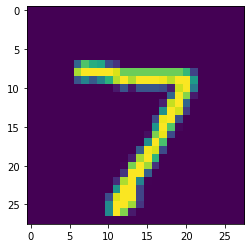

In [14]:
plt.imshow(x_test[0].reshape(28,28))
plt.show

In [15]:
sess.run(hx, {x:x_test[[0]]}) #7이라는 이미지를 주었을 때 예측값이 얼마인가

array([[1.5818495e-04, 9.4068682e-06, 2.9692595e-04, 2.8528997e-03,
        2.9379860e-05, 1.6098951e-04, 1.9529787e-06, 9.9102122e-01,
        1.6677621e-04, 5.3021894e-03]], dtype=float32)

In [16]:
sess.run(hx, {x:x_test[[0]]}).argmax(axis=1)

array([7], dtype=int64)

In [17]:
t = sess.run(hx,{x:x_test})

In [18]:
(t.argmax(axis=1)==y_test.argmax(axis=1)).mean() 

0.9138

정확도를 더 높게하는 방법

: 'cnn'을 활용하면 정확도가 100퍼센트 가까이 나온다. 

- 사람 얼굴이나 복잡한 이미지 training 할 경우